In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df_random = pd.read_csv("testrun_harmonizedKnowledge_seed4.csv")
df_MultG2 = pd.read_csv("testrun_harmonizedKnowledge_seed4_std5_number_gaussians2.csv")
df_MultG6 = pd.read_csv("testrun_harmonizedKnowledge_seed4_std5_number_gaussians6.csv")
df_noisy = pd.read_csv("testrun_harmonizedKnowledge_prop_random5_seed4_std5_std_curiosity0.2.csv")
pd.set_option('display.max_columns', None)
# df.head()

In [2]:
def plot_smt(name, datasets_dict):
    """
    datasets_dict: dictionary with {label: dataframe} pairs
    """
    curiosities = sorted(list(set().union(*[df["initial_curiosity"].unique() for df in datasets_dict.values()])))
    
    for label, df in datasets_dict.items():
        avg_values = [df[df["initial_curiosity"]==c][name].mean() for c in curiosities]
        std_values = [df[df["initial_curiosity"]==c][name].std() for c in curiosities]
        plt.errorbar(curiosities, avg_values, yerr=std_values, fmt='-o', label=label)
    
    plt.xlabel("Initial Curiosity")
    plt.ylabel(name)
    plt.title(f"{name} vs Initial Curiosity")
    plt.legend()
    plt.grid()
    plt.show()

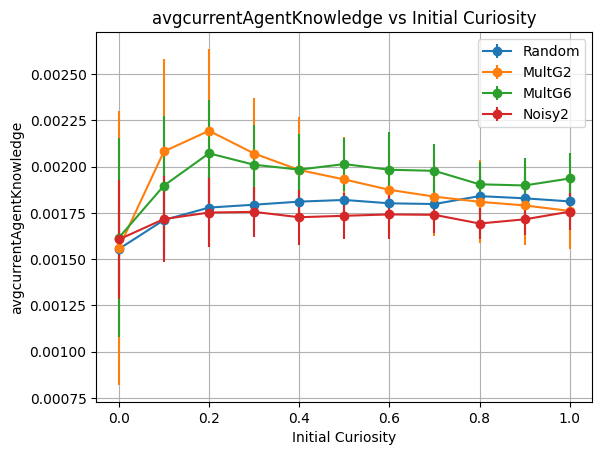

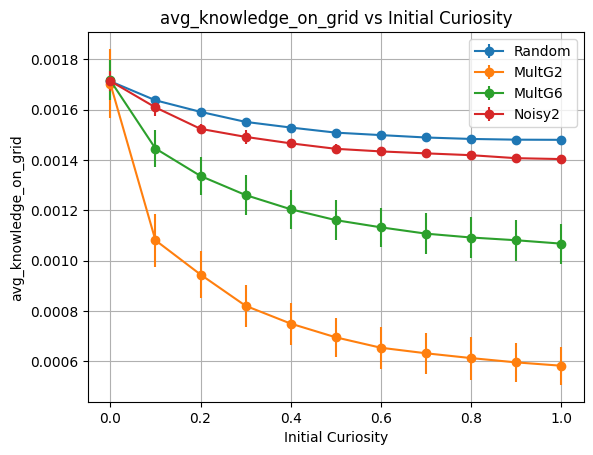

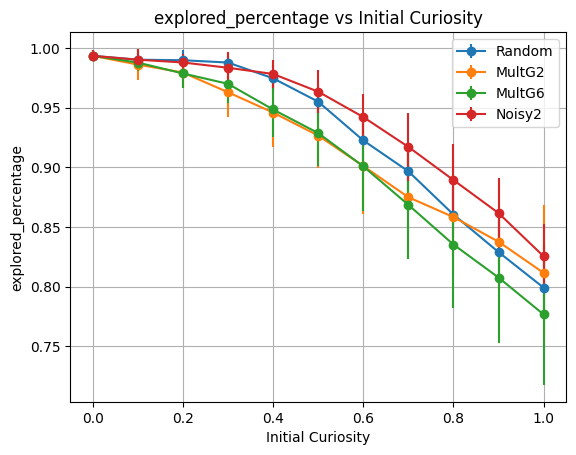

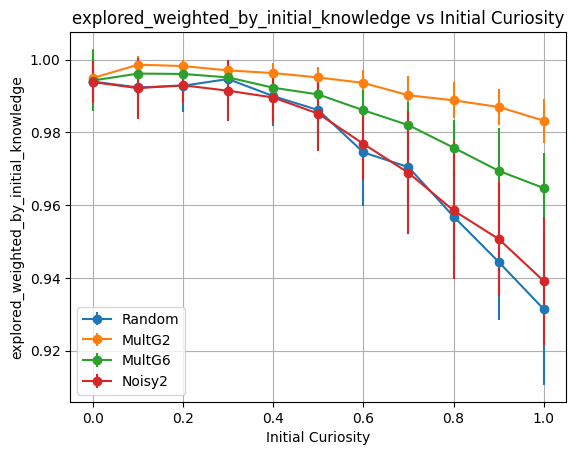

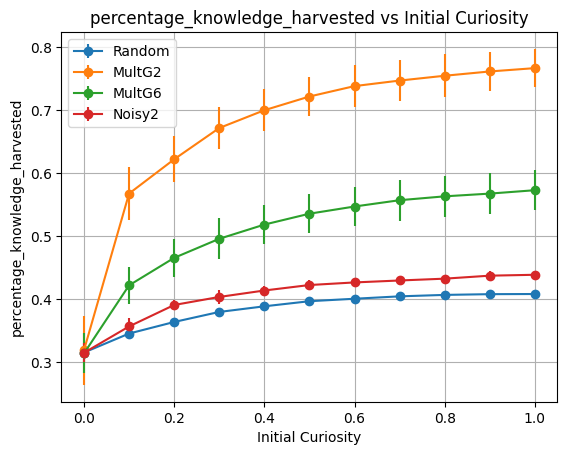

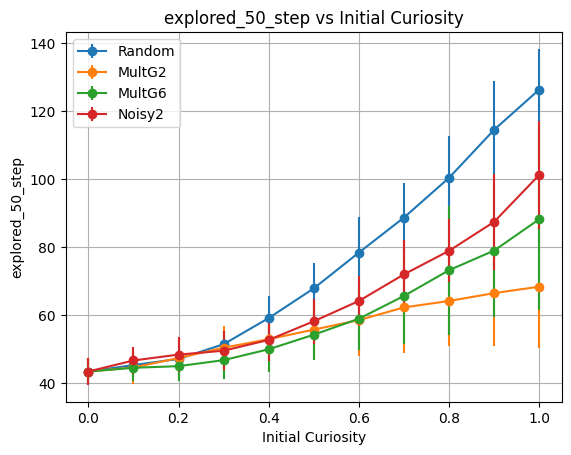

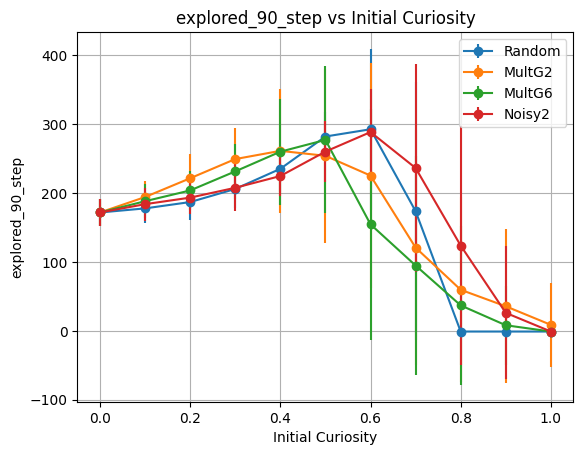

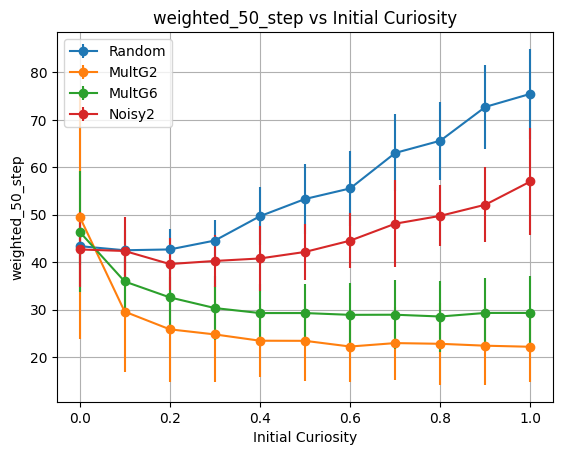

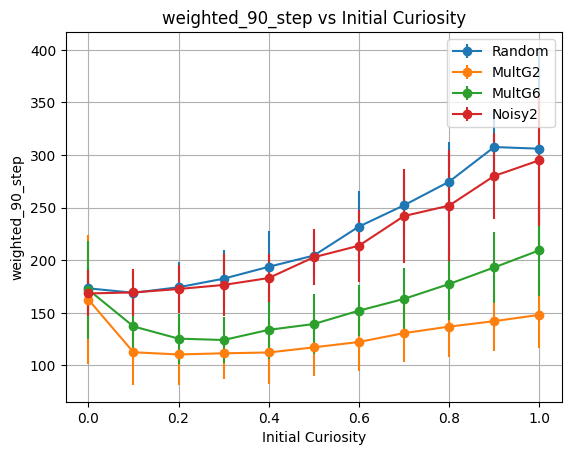

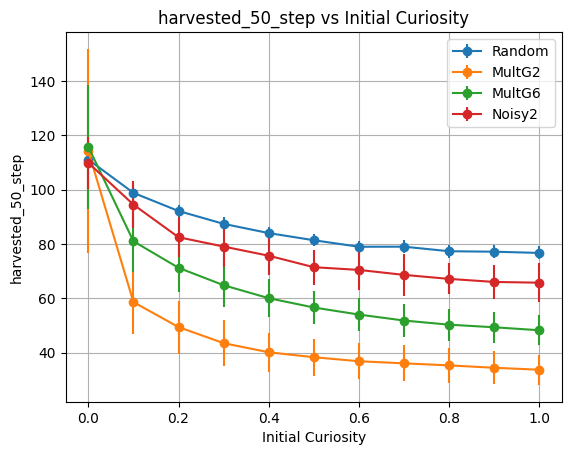

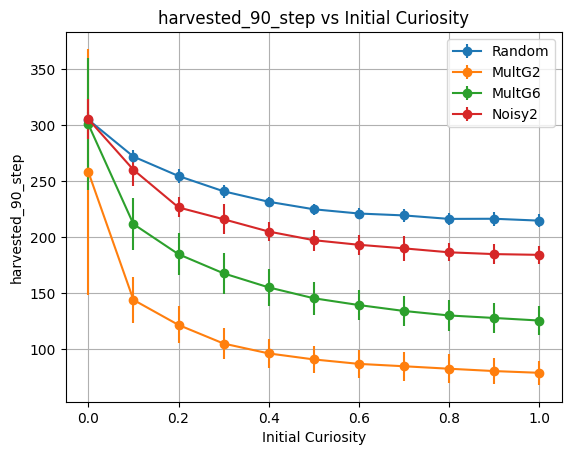

In [4]:
datasets = {
    'Random': df_random,
    'MultG2': df_MultG2,
    'MultG6': df_MultG6,
    'Noisy2': df_noisy
}
plot_smt("avgcurrentAgentKnowledge", datasets)
plot_smt("avg_knowledge_on_grid", datasets)
plot_smt("explored_percentage", datasets)
plot_smt("explored_weighted_by_initial_knowledge", datasets)
plot_smt("percentage_knowledge_harvested", datasets)
plot_smt("explored_50_step", datasets)
plot_smt("explored_90_step", datasets)
plot_smt("weighted_50_step", datasets)
plot_smt("weighted_90_step", datasets)
plot_smt("harvested_50_step", datasets)
plot_smt("harvested_90_step", datasets)
